In [12]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [13]:
np.random.seed(0)

In [14]:
X, y = make_blobs(n_samples=5000, cluster_std=0.5)
print(X)
print(y)

[[ 2.004049    0.58776127]
 [-1.83496118  2.48014188]
 [-1.7112978   3.29116459]
 ..., 
 [-0.41546965  3.07172354]
 [-2.17452294  3.02953879]
 [-2.25915029  3.42384279]]
[1 2 2 ..., 2 2 2]


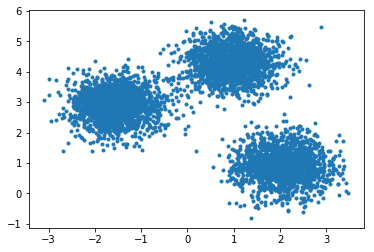

In [15]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [16]:
k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 1)

In [17]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
k_means_labels = k_means.labels_
print(k_means_labels)

[4 5 2 ..., 3 2 2]


In [19]:
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[ 0.96228575  4.30274853]
 [ 1.75478641  1.20362012]
 [-1.97176075  3.07517585]
 [-1.07272518  3.25568281]
 [ 2.33213222  0.6232393 ]
 [-1.45098023  2.39633907]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


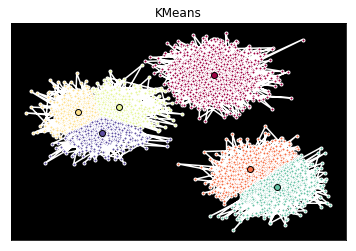

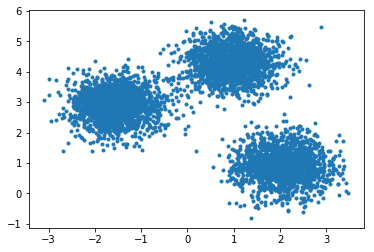

In [20]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background (background is black because we can see the points
# connection to the centroid.
ax = fig.add_subplot(1, 1, 1, axisbg = 'black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[2, 2],[1,-2],[-1,0], [-2, -1], [4, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='.')